In [38]:
ls /home/data/JC131/20231206_140953/kilosort2.5/

imec0/  imec1/  imec2/  imec3/  imec4/


In [1]:
from spks import *


clus = MultiprobeClusters(['/home/data/JC140/20231206_140953/kilosort2.5'])
# clus = MultiprobeClusters(['/home/data/JC140/20231213_165932/kilosort2.5'])
# clus = MultiprobeClusters(['/home/data/JC140/20231214_175957/kilosort2.5'])
# clus = MultiprobeClusters(['/home/data/JC140/20231216_172624/kilosort2.5'])


# MultiprobeClusters??



In [2]:
# [c.compute_statistics(recompute = True) for c in clus.clusters]

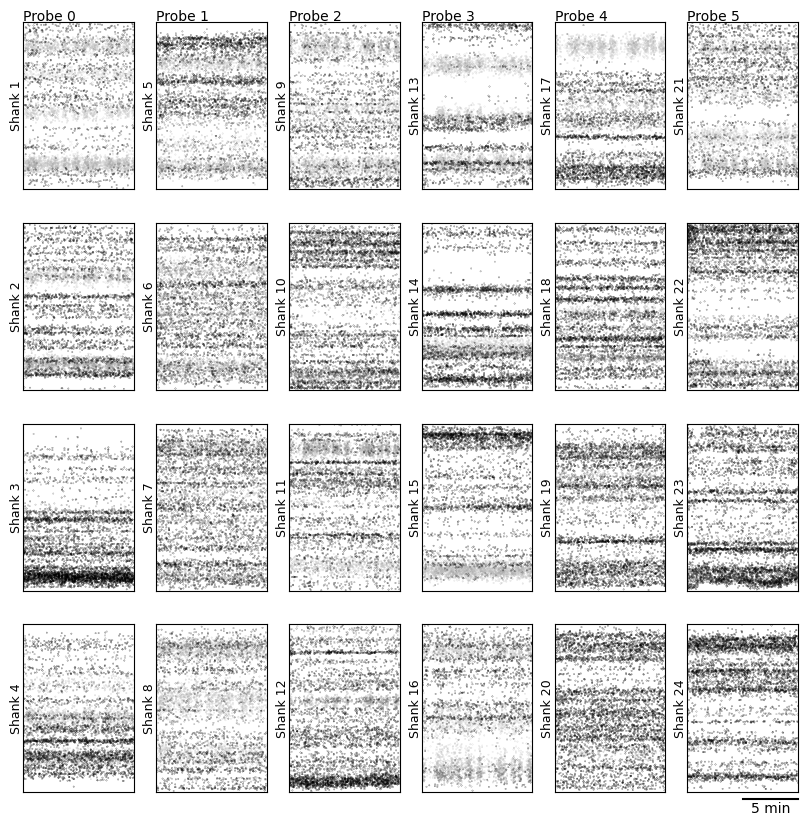

In [70]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize = [10,10])

for i,clu in enumerate(clus.clusters):
    sp = clu.spike_times/clu.sampling_rate
    clu.compute_template_amplitudes_and_depths()
    depth = clu.spike_positions[:,1]
    amps = clu.spike_amplitudes
    for shank in np.unique(clu.shank):     
        fig.add_subplot(4,6,i+6*shank+1)
        if shank == 0:
            plt.xlabel(f'Probe {i}',loc = 'left',labelpad = 1)
        clusters = clu.cluster_id[(clu.shank == shank)].flatten()
        idx = tensor_to_numpy(torch.nonzero(torch.isin(clu._spike_clusters_t,numpy_to_tensor(clusters.astype(np.int64)))).flatten())
        tidx = np.where(sp[idx]<600)[0]
        plot_drift_raster(sp[idx][tidx],
                        depth[idx][tidx],
                        amps[idx][tidx],rasterized=True ,clim=[0,1000],n_spikes_to_plot=5000,cmap='gray_r')
        plt.yticks([])
        plt.xticks([])
        shank = 4*i+shank+1
        plt.ylabel(f'Shank {shank}',color='black',labelpad = 0.1,fontsize=9)
        plt.gca().xaxis.set_label_position('top') 
plt.plot([300,600],np.min(depth[idx][tidx])-np.array([30,30]),clip_on=False,color='k')
plt.text(450,np.min(depth[idx][tidx])-38,'5 min',va = 'top',ha = 'center');

figurespath = Path('../figures/rasters_multishank/')
figurespath.mkdir(exist_ok=True,parents=True)
fig.savefig(figurespath/'rasters_per_shank_JC140_24shanks.pdf')

In [9]:
all_units = []
all_mua = []
for c in clus.clusters:
    all_units.append(np.sum((c.isi_contamination<0.1) & (c.amplitude_cutoff<0.1) & 
                            (np.abs(c.trough_amplitude)>25) &
                            (c.n_active_channels<100)))
    all_mua.append(np.sum((c.n_active_channels<100)))
np.sum(all_units),np.sum(all_mua)


/tmp/ipykernel_3050842/2921409214.py:4: RuntimeWarning: invalid value encountered in less
  all_units.append(np.sum((c.isi_contamination<0.1) & (c.amplitude_cutoff<0.1) &


(1176, 4030)

(893, 90, 384)

In [50]:
np.where(estimate_active_channels(cluster_waveforms_mean)>50)[0]

array([  1,  16,  18,  19,  26,  27,  30,  32,  39,  40,  42,  43,  44,
        50,  56,  57,  60,  65,  68,  73,  80,  81,  86, 101, 102, 103,
       107, 110, 119, 139, 141, 144, 153, 158, 167, 168, 189, 196, 214,
       215, 230, 233, 238, 243, 272, 273, 279, 290, 293, 296, 302, 309,
       310, 317, 318, 326, 328, 332, 335, 343, 344, 345, 346, 347, 348,
       351, 352, 353, 385, 395, 402, 408, 419, 420, 434, 435, 443, 445,
       449, 452, 457, 466, 473, 474, 480, 486, 488, 496, 500, 506, 508,
       511, 519, 520, 521, 522, 526, 527, 537, 538, 545, 549, 552, 561,
       565, 568, 569, 571, 573, 574, 590, 607, 608, 639, 659, 693, 717,
       733, 738, 768, 769, 776, 778, 782, 786, 796, 797, 798, 800, 802,
       805, 811, 813, 825, 833, 872, 889])

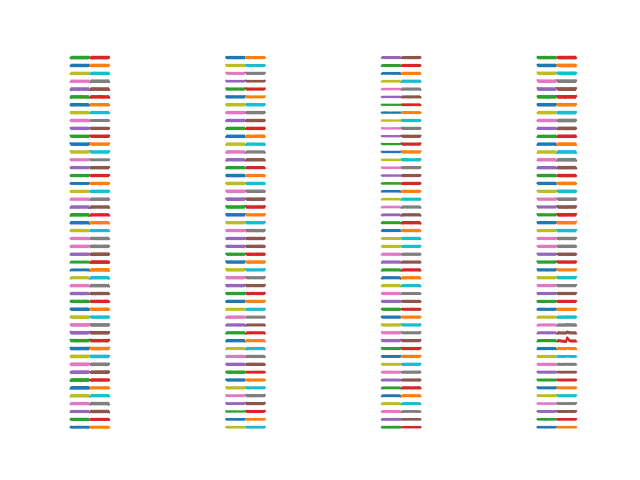

In [54]:
plt.figure()
plot_footprints(cluster_waveforms_mean[872],clus.clusters[0].channel_positions);

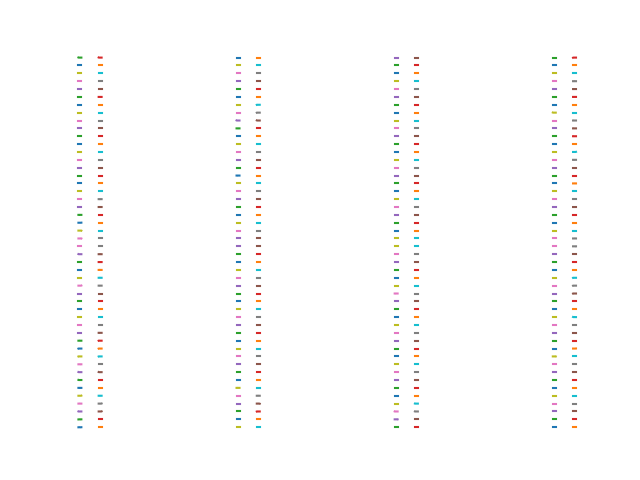

In [8]:
# a = estimate_active_channels(clus.clusters[0].cluster_waveforms_mean)
cluster_waveforms_mean = clus.clusters[0].cluster_waveforms_mean
%matplotlib widget
plt.figure()
plot_footprints(cluster_waveforms_mean[0,:(nsamples//2-N),:],clus.clusters[0].channel_positions);

In [4]:
nclusters,nsamples,nchannels = cluster_waveforms_mean.shape
N = int(nsamples/3)
peak_amp = [mwave[nsamples//2-N:nsamples//2+N,:].max(axis=0) - 
            mwave[nsamples//2-N:nsamples//2+N,:].min(axis=0)
        for mwave in cluster_waveforms_mean] # gets the amps in the center
(nsamples//2-N,nsamples//2+N)


(15, 75)

In [21]:
channel_mad = np.mean(cluster_waveforms_mean[:,:,:].reshape(-1,nchannels),axis = 0) 
mad(np.stack(peak_amp))

array([11.2208664, 11.2208664, 11.2208664, 11.2208664, 11.2208664,
       16.8312996, 11.2208664, 16.8312996, 16.8312996, 11.2208664,
       16.8312996, 11.2208664, 16.8312996, 11.2208664, 16.8312996,
       16.8312996, 16.8312996, 16.8312996, 16.8312996, 16.8312996,
       16.8312996, 16.8312996, 16.8312996, 16.8312996, 16.8312996,
       16.8312996, 16.8312996, 16.8312996, 16.8312996, 16.8312996,
       16.8312996, 16.8312996, 16.8312996, 16.8312996, 16.8312996,
       16.8312996, 16.8312996, 16.8312996, 11.2208664, 16.8312996,
       11.2208664, 16.8312996, 11.2208664, 16.8312996, 16.8312996,
       16.8312996, 16.8312996, 16.8312996, 11.2208664, 11.2208664,
       11.2208664, 11.2208664,  5.6104332, 11.2208664, 11.2208664,
       16.8312996, 11.2208664, 16.8312996, 16.8312996, 11.2208664,
       11.2208664, 11.2208664, 16.8312996, 11.2208664, 11.2208664,
       16.8312996, 11.2208664, 16.8312996, 11.2208664, 16.8312996,
       16.8312996, 11.2208664, 11.2208664, 11.2208664, 16.8312